In [150]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt,nltk
import json, tweepy, re, string, seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk import FreqDist

In [116]:
with open("token_twt.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [117]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini

# Alasan memilih kata kunci 'Will Smith'

Kata kunci yang dipilih adalah 'Will Smith' karena hal yang dilakukan will smith di panggung grammy sangat menggemparkan.

Saya ingin melihat bagaimana sikap dan pandangan netizen Indonesia terhadap fenomena ini, karena topik ini bukan topik politik, kemungkinan hasilnya akan memiliki lebih sedikit buzz tweet. Hasil dari analisis ini akan memperlihat lebih banyak pikiran dari netizen twitter di Indonesia soal kejadian ini.

In [118]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya
tokens.keys()

apiv2 = tweepy.Client(bearer_token, wait_on_rate_limit = True)

query = 'will smith lang:id -is:retweet'

response = tweepy.Paginator(apiv2.search_recent_tweets,
                            query=query).flatten(limit = 300)

result = [tweet.text.strip() for tweet in response]

list_tweet = []

for tweet in result:
    list_tweet.append(tweet)

In [119]:
df = pd.DataFrame(list_tweet,columns=['tweet'])
display (df)

,tweet
0,"Menurut Kenny, permintaan maaf yang disampaika..."
1,Entah kenapa gw punya feeling kejadian will sm...
2,"Will Smith amewekwa kwa hio marriage buana, sa..."
3,"Tamparannya di Oscar Dikecam, Film Baru Will S..."
4,"Jika Anda tidak mau bekerja keras, biarkan ora..."
...,...
295,@Kodok1_OM @sukafantasy46 Ini yang will smith ...
296,Gmn caranya dpt misua pemikirannya kayak will ...
297,diroasting abis2an gak tuh di grammy si will s...
298,"@mbhfur tunggu saja itu, menyusul lagi yang la..."


In [120]:
for tweet in df['tweet']:
    print (f'{tweet}\n')

Menurut Kenny, permintaan maaf yang disampaikan Will Smith dalam pidato kemenangan hanya ditujukan kepada the Academy dan sesama peraih nominasi.

#willsmith #chrisrock #kennyrock #oscar2022

https://t.co/PbnsBMOtmz

Entah kenapa gw punya feeling kejadian will smith nampol chris rock bakal ada versi Indonesianya

Will Smith amewekwa kwa hio marriage buana, sasa Jada badala ya kudefend his hubby anasema hangemslap, never do anything to impress women buana.

Tamparannya di Oscar Dikecam, Film Baru Will Smith https://t.co/djiKYHVuQj

Jika Anda tidak mau bekerja keras, biarkan orang lain melakukannya. Saya lebih suka bersama seseorang yang melakukan pekerjaan yang berantakan, tetapi memberi 110 persen dibandingkan dengan seseorang yang melakukan pekerjaan yang baik dan memberi 60 persen ~ will smith

@KamalChauhan89 Will Smith in parallel universe-"bolo zubaa kesri"

mana gang yg backup will smith haritu? terpaling jaga maruah bini 🤮 https://t.co/npu6GOshkM

Ousi o utlwang Will Smith?🤔nkam

In [121]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian
def CFolding (data):
    list_db = []
    for tweet in data:
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
        data_baru = tweet.lower()
        data_baru = re.sub(r"\d+", " ", data_baru)
        data_baru = re.sub(r"[^a-zA-Z0-9\n\.]", " ", data_baru)
        data_baru = data_baru.translate(str.maketrans("","",string.punctuation))
        data_baru = emoji_pattern.sub(r'',data_baru)
        sps = ["  ","   ","    ","     ","      ","       ","        ", "         "]
        for i in sps:
            data_baru = data_baru.replace(i," ")
        list_db.append(data_baru)
    return list_db

def Tknzg (data):
    list_hsl = []
    for tweet in data:
        hsl = tweet.split()
        list_hsl.append(hsl)
    return list_hsl

def stword (data):
    list_tweet = []
    stopwordes = ['dan', 'tapi', 'terpopuler','saya','dia','lo','atau','yg','tp','mnurut','ad','guwa','gue','spt','memang','emang','aku','kamu','anda','engkau','kamu','ia','dia','lo','lu','mereka','kami','kita','ini','itu','di','dari','ke','pada','para','sebab','karena','supaya','sampai','sehingga','atau','maupun','melainkan','sedangkan','tetapi','setelah','sejak','tco','https','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','jni','nya','gawn','an','aja','sbvetqbnmo','cnnindonesia','convomfs','detikcom','kompastv','kumparan','republikaonline'] + stopwords.words('indonesian')
    stopwordes = list(tuple(stopwordes))
    for tweet in data:
        hsl_kata = [kata for kata in tweet if kata not in stopwordes]
        list_tweet.append(hsl_kata)
    return list_tweet

list_tweet_bersih = stword(Tknzg(CFolding(df['tweet'])))
tweet_bersih = [ ' '.join(tweet) for tweet in list_tweet_bersih]

df['tweet_bersih'] = tweet_bersih
display(df)

,tweet,tweet_bersih
0,"Menurut Kenny, permintaan maaf yang disampaika...",kenny permintaan maaf will smith pidato kemena...
1,Entah kenapa gw punya feeling kejadian will sm...,gw feeling kejadian will smith nampol chris ro...
2,"Will Smith amewekwa kwa hio marriage buana, sa...",will smith amewekwa kwa hio marriage buana sas...
3,"Tamparannya di Oscar Dikecam, Film Baru Will S...",tamparannya oscar dikecam film will smith djik...
4,"Jika Anda tidak mau bekerja keras, biarkan ora...",keras biarkan orang melakukannya suka pekerjaa...
...,...,...
295,@Kodok1_OM @sukafantasy46 Ini yang will smith ...,kodok om sukafantasy will smith jada jalanin y...
296,Gmn caranya dpt misua pemikirannya kayak will ...,gmn dpt misua pemikirannya kayak will smith
297,diroasting abis2an gak tuh di grammy si will s...,diroasting abis gak tuh grammy si will smith w...
298,"@mbhfur tunggu saja itu, menyusul lagi yang la...",mbhfur tunggu menyusul hahaha gak salah amit w...


In [122]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"
with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))


hasil = []

for tweet in df['tweet_bersih']:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          bad_count += count

    hasil.append(good_count - bad_count)

sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df["skor"] = hasil
df["sentiment"] = sentiments

display(df)

,tweet,tweet_bersih,skor,sentiment
0,"Menurut Kenny, permintaan maaf yang disampaika...",kenny permintaan maaf will smith pidato kemena...,2,positif
1,Entah kenapa gw punya feeling kejadian will sm...,gw feeling kejadian will smith nampol chris ro...,0,netral
2,"Will Smith amewekwa kwa hio marriage buana, sa...",will smith amewekwa kwa hio marriage buana sas...,0,netral
3,"Tamparannya di Oscar Dikecam, Film Baru Will S...",tamparannya oscar dikecam film will smith djik...,-1,negatif
4,"Jika Anda tidak mau bekerja keras, biarkan ora...",keras biarkan orang melakukannya suka pekerjaa...,0,netral
...,...,...,...,...
295,@Kodok1_OM @sukafantasy46 Ini yang will smith ...,kodok om sukafantasy will smith jada jalanin y...,0,netral
296,Gmn caranya dpt misua pemikirannya kayak will ...,gmn dpt misua pemikirannya kayak will smith,0,netral
297,diroasting abis2an gak tuh di grammy si will s...,diroasting abis gak tuh grammy si will smith w...,0,netral
298,"@mbhfur tunggu saja itu, menyusul lagi yang la...",mbhfur tunggu menyusul hahaha gak salah amit w...,1,positif


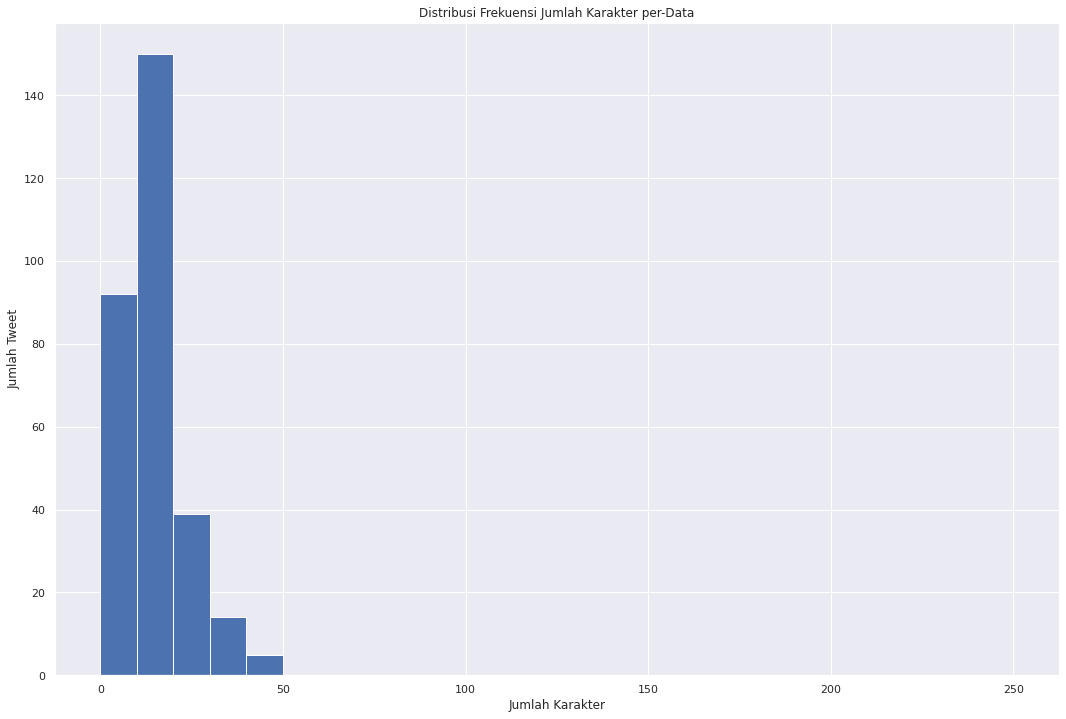

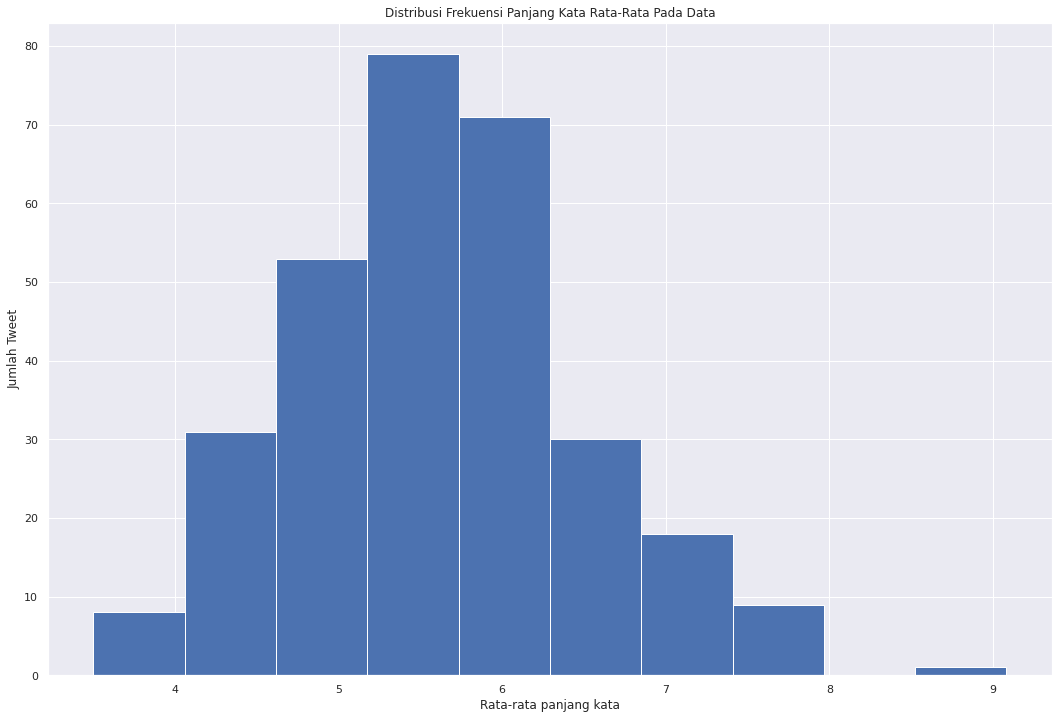

<FreqDist with 2141 samples and 4300 outcomes>
[('will', 302), ('smith', 301), ('rock', 93), ('chris', 87), ('oscar', 47), ('film', 37), ('ya', 36), ('orang', 30), ('jada', 25), ('na', 23), ('tampar', 19), ('insiden', 17), ('and', 15), ('grammy', 15), ('netflix', 14), ('salah', 13), ('ni', 13), ('wa', 13), ('academy', 12), ('si', 12), ('tamparan', 12), ('nampar', 11), ('gak', 11), ('menampar', 11), ('willsmith', 10), ('gw', 10), ('fast', 10), ('kalo', 10), ('ga', 10), ('panggung', 10), ('loose', 10), ('the', 9), ('kejadian', 9), ('in', 9), ('sih', 9), ('gara', 9), ('piala', 9), ('maaf', 8), ('udah', 8), ('dibintangi', 8), ('membela', 8), ('bad', 8), ('mel', 8), ('gibson', 8), ('millardayo', 8), ('filamu', 8), ('za', 8), ('kwa', 7), ('richard', 7), ('tu', 7)]


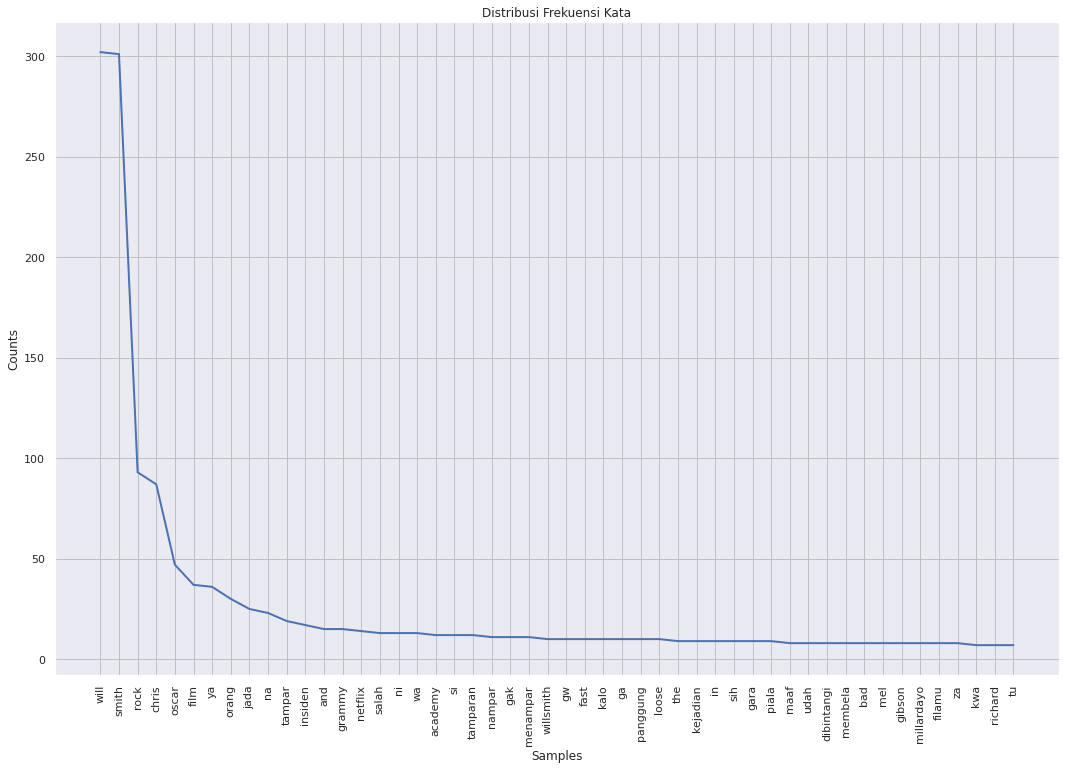

(will, smith)         291
(chris, rock)          81
(smith, chris)         17
(tampar, chris)        14
(tamparan, will)       10
(fast, and)            10
(and, loose)           10
(smith, nampar)         9
(mel, gibson)           8
(menampar, chris)       8
(dibintangi, will)      8
(ya, will)              7
(smith, menampar)       7
(smith, tampar)         7
(film, will)            7
(rock, panggung)        7
(insiden, will)         6
(panggung, oscar)       6
(bad, boys)             6
(king, richard)         6
dtype: int64

In [161]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.
def DFJ_KD (data):
    fig = plt.figure(figsize=(18,12))
    plt.title('Distribusi Frekuensi Jumlah Karakter per-Data')
    plt.xlabel('Jumlah Karakter') 
    plt.ylabel('Jumlah Tweet') 
    bin_range = np.arange(0,260,10)
    data.str.len().hist(bins=bin_range)
    plt.show()

def DFJ_MD (data):
    fig = plt.figure(figsize=(18,12))
    plt.title('Distribusi Frekuensi Panjang Kata Rata-Rata Pada Data')
    plt.xlabel('Rata-rata panjang kata') 
    plt.ylabel('Jumlah Tweet') 
    data.apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.show()

def DFK (data):
    fig = plt.figure(figsize=(18,12))
    plt.title('Distribusi Frekuensi Kata')
    tweets = [word for tweet in data for word in tweet]
    fqdist = FreqDist(tweets)
    print(fqdist)
    most_common_word = fqdist.most_common(50)
    print(most_common_word)
    fqdist.plot(50,cumulative=False)
    plt.show()

def DNG (data):
   tweets = [word for tweet in data for word in tweet]
   hasil = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
   return hasil
itwt = df.copy()
itwt ['tweet_bersih'] = Tknzg(df['tweet_bersih'])
twt = itwt ['tweet_bersih']

DFJ_KD(twt)
DFJ_MD(twt)
DFK(twt)
DNG(twt)


Mean: -0.4066666666666667
Median: 0.0
quartil awal: -1.0
quartil akhir: 0.0
Standar deviasi: 1.2279884183311973   



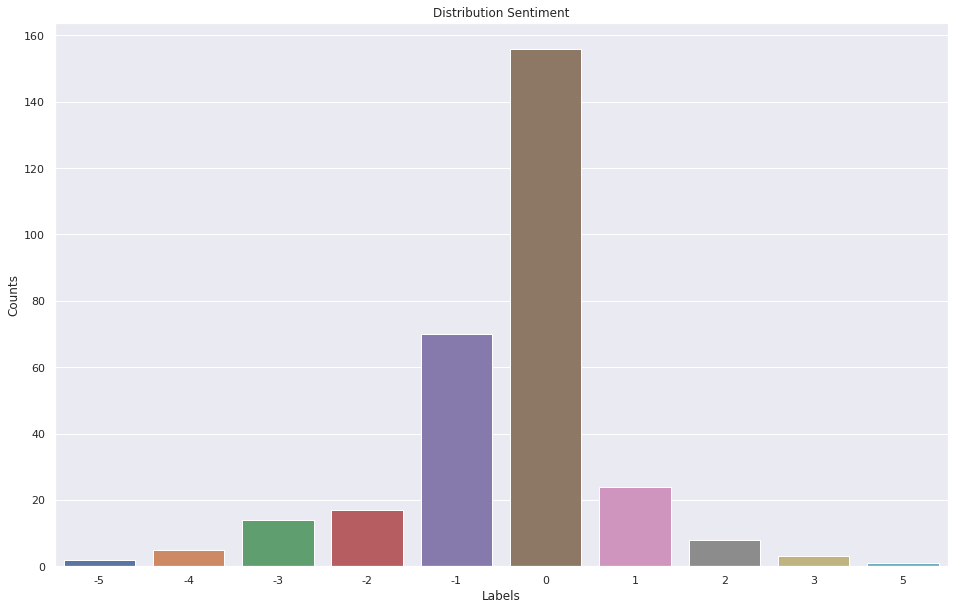

In [144]:
print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}   
''')
fig = plt.figure(figsize=(16,10))

sns.set_theme(style="darkgrid")

sns.countplot(x="skor", data=df)

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

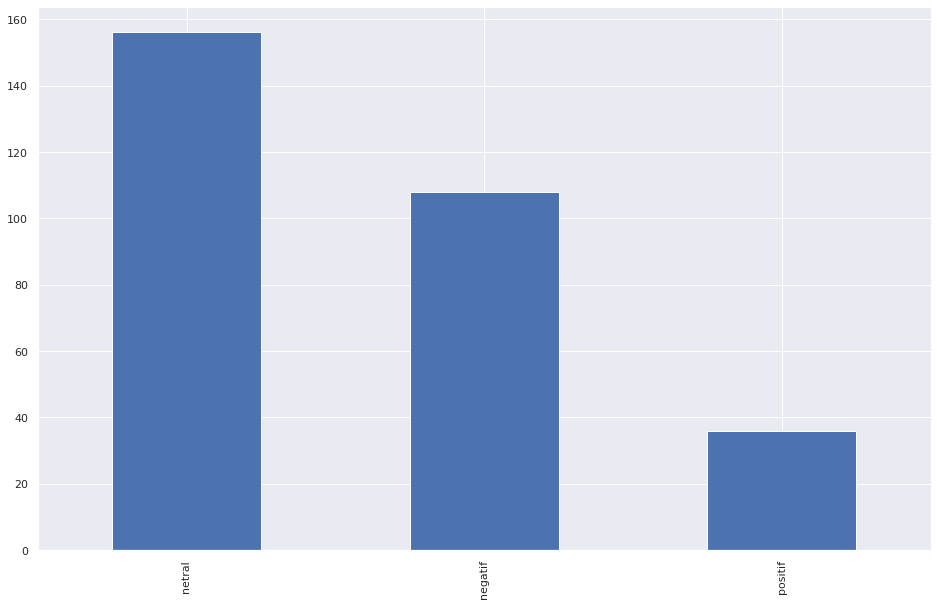

In [162]:
fig = plt.figure(figsize=(16,10))
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()


# Analisis data
- Dari sampel tweet yang didapatkan terlihat bahwa sentimen dari sampel 300 tweet ini kebanyakan adalah netral yang berarti kebanyakan dari tweetnya bermaksud untuk pemberitaan atau menyampaikan apa yang terjadi dan bukan opini tentang kejadian tersebut.
- Jika dilihat sentimen selain netral dapat dilihat kebanyakan dari netizen twitter menilai negatif insiden tersebut. Awalnya saya kira insiden ini akan banyak dinilai positif karena pada awal-awal kejadian banyak sekali yang menjadikan insiden ini sebagai meme dan menganggapnya 'berani, tetapi mungkin karena yang dilihat tweet yang sudah lama dari hari kejadian jadi sudah banyak opini-opini luar yang menjalar dan fakta-fakta pada kejadian yang akhirnya merubah sentimen dari netizen twitter Indonesia.
- Sebenarnya saya dari dulu ingin melihat seberapa besar pengaruh media dalam 'menginfluence' para netizen Indonesia yang bisa dibilang sudah lebih modern ini, apakah netizen Indonesia akan tetap mengikuti perspektif awalnya atau lambat lawun akan mengikuti sumber berita yang ada. Pertanyaan saya ini sebenarnya ingin melihat apakah yang netizen tulis pada saat kejadian itu merupakan kata-kata dari buah pikiran yang matang atau hanya kata-kata yang mengikuti emosi sesaat. Walaupun setelah melakukan pengambilan data ini saya masih belum mengambil kesimpulan karena saya tidak memiliki data tweet saat beberapa hari setelah kejadian, tapi menurut perkiraan saya terjadi penggiringan opini setelah beberapa hari kejadian tersebut terjadi, kemungkinannya adalah netizen melihat momen tersebut seperti momen historis atau opini yang dituliskan merupakan emosi kagum sesaat jadi tidak melihat faktor-faktor lain yang seharusnya dipikirkan dalam kejadian tersebut.